In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import scipy

In [2]:
data_frame = pd.read_csv('dog_rates_tweets.csv',parse_dates = ['created_at'])                                                                              # instruction in Step 4
data_frame

,id,created_at,text
0,994677639364403200,2018-05-10 20:36:44,@Steff88979267 tell them to h*ck off
1,994364904978239488,2018-05-09 23:54:02,@NFLOwnerGBP take it back
2,994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...
3,994336722875047936,2018-05-09 22:02:03,@rachaellanaghan ❤️
4,994024065982717952,2018-05-09 01:19:40,This is Captain Jack Wobbles. He is currently ...
...,...,...,...
8510,1027980978910687233,2018-08-10 18:12:18,@GregWWoods thanks for donating $10.00 to @dog...
8511,1027976875811819520,2018-08-10 17:56:00,@DiannaC thanks for donating $10.00 to @dog_ra...
8512,1027970381766963202,2018-08-10 17:30:12,@runnjen @livelikeroo @Goodworld omg Justice y...
8513,1027967697684815873,2018-08-10 17:19:32,@shelbymorganart thanks for donating $10.00 to...


In [3]:
numeric_rating = data_frame['text'].str.extract(r'(\d+(\.\d+)?)/10')
boolean_flag = numeric_rating[0].notna()
Extracted_df = data_frame.loc[boolean_flag]
Extracted_df

,id,created_at,text
2,994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...
7,993889039714578432,2018-05-08 16:23:07,This is Manny. He hasn’t seen your croissant. ...
8,993629544463642624,2018-05-07 23:11:58,This is Libby. She leap. 14/10\n(IG: libbythef...
24,992198572664860672,2018-05-04 00:25:48,This is Rosie. She thought Coachella was this ...
30,991744041351090177,2018-05-02 18:19:39,This is Riley. He’ll be your chauffeur this ev...
...,...,...,...
7363,1032725635888803841,2018-08-23 20:25:53,This is Noodles. He had brain surgery earlier ...
7369,1032310288652152832,2018-08-22 16:55:26,This is Pingo and Nina. They are believed to b...
7381,1031696422813544448,2018-08-21 00:16:09,This is Nikita. She got caught in some wild fl...
7431,1029767403545288706,2018-08-15 16:30:55,This is Winston. He came home for the first ti...


In [4]:
rate = pd.to_numeric(numeric_rating[0].dropna())
Rate_series = pd.Series(data=rate,index = None,name = 'Rating')
Extracted_df = pd.concat([Extracted_df,Rate_series],axis = 1)
Extracted_df

,id,created_at,text,Rating
2,994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...,14.0
7,993889039714578432,2018-05-08 16:23:07,This is Manny. He hasn’t seen your croissant. ...,13.0
8,993629544463642624,2018-05-07 23:11:58,This is Libby. She leap. 14/10\n(IG: libbythef...,14.0
24,992198572664860672,2018-05-04 00:25:48,This is Rosie. She thought Coachella was this ...,13.0
30,991744041351090177,2018-05-02 18:19:39,This is Riley. He’ll be your chauffeur this ev...,13.0
...,...,...,...,...
7363,1032725635888803841,2018-08-23 20:25:53,This is Noodles. He had brain surgery earlier ...,14.0
7369,1032310288652152832,2018-08-22 16:55:26,This is Pingo and Nina. They are believed to b...,14.0
7381,1031696422813544448,2018-08-21 00:16:09,This is Nikita. She got caught in some wild fl...,13.0
7431,1029767403545288706,2018-08-15 16:30:55,This is Winston. He came home for the first ti...,14.0


In [5]:
Extracted_df_2 = Extracted_df[Extracted_df['Rating']<=25]
Extracted_df_2

,id,created_at,text,Rating
2,994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...,14.0
7,993889039714578432,2018-05-08 16:23:07,This is Manny. He hasn’t seen your croissant. ...,13.0
8,993629544463642624,2018-05-07 23:11:58,This is Libby. She leap. 14/10\n(IG: libbythef...,14.0
24,992198572664860672,2018-05-04 00:25:48,This is Rosie. She thought Coachella was this ...,13.0
30,991744041351090177,2018-05-02 18:19:39,This is Riley. He’ll be your chauffeur this ev...,13.0
...,...,...,...,...
7363,1032725635888803841,2018-08-23 20:25:53,This is Noodles. He had brain surgery earlier ...,14.0
7369,1032310288652152832,2018-08-22 16:55:26,This is Pingo and Nina. They are believed to b...,14.0
7381,1031696422813544448,2018-08-21 00:16:09,This is Nikita. She got caught in some wild fl...,13.0
7431,1029767403545288706,2018-08-15 16:30:55,This is Winston. He came home for the first ti...,14.0


In [6]:
def to_timestamp(argument): 
    return argument.timestamp()
    
timestamp_data = Extracted_df_2['created_at'].apply(to_timestamp)
timestamp_series = pd.Series(data = timestamp_data,index= None,name ='timestamp')
Extracted_df_2 = pd.concat([Extracted_df_2,timestamp_series],axis = 1)
Extracted_df_2['timestamp']

2       1.525910e+09
7       1.525797e+09
8       1.525735e+09
24      1.525394e+09
30      1.525285e+09
            ...     
7363    1.535056e+09
7369    1.534957e+09
7381    1.534811e+09
7431    1.534351e+09
7433    1.534299e+09
Name: timestamp, Length: 1669, dtype: float64

In [8]:
fit = scipy.stats.linregress(Extracted_df_2['timestamp'],Extracted_df_2['Rating'])
fit.slope,fit.intercept

(np.float64(3.515929974847722e-08), np.float64(-40.46415480898917))

In [10]:
prediction_data = Extracted_df_2['timestamp']*fit.slope + fit.intercept
prediction_series = pd.Series(data = prediction_data, index = None, name = 'prediction')
Extracted_df_2 = pd.concat([Extracted_df_2,prediction_series],axis = 1)
Extracted_df_2

,id,created_at,text,Rating,timestamp,prediction,prediction
2,994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...,14.0,1.525910e+09,13.185763,13.185763
7,993889039714578432,2018-05-08 16:23:07,This is Manny. He hasn’t seen your croissant. ...,13.0,1.525797e+09,13.181785,13.181785
8,993629544463642624,2018-05-07 23:11:58,This is Libby. She leap. 14/10\n(IG: libbythef...,14.0,1.525735e+09,13.179609,13.179609
24,992198572664860672,2018-05-04 00:25:48,This is Rosie. She thought Coachella was this ...,13.0,1.525394e+09,13.167614,13.167614
30,991744041351090177,2018-05-02 18:19:39,This is Riley. He’ll be your chauffeur this ev...,13.0,1.525285e+09,13.163804,13.163804
...,...,...,...,...,...,...,...
7363,1032725635888803841,2018-08-23 20:25:53,This is Noodles. He had brain surgery earlier ...,14.0,1.535056e+09,13.507338,13.507338
7369,1032310288652152832,2018-08-22 16:55:26,This is Pingo and Nina. They are believed to b...,14.0,1.534957e+09,13.503856,13.503856
7381,1031696422813544448,2018-08-21 00:16:09,This is Nikita. She got caught in some wild fl...,13.0,1.534811e+09,13.498710,13.498710
7431,1029767403545288706,2018-08-15 16:30:55,This is Winston. He came home for the first ti...,14.0,1.534351e+09,13.482540,13.482540


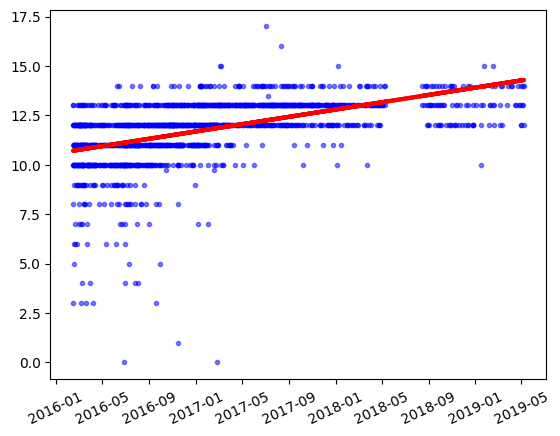

In [11]:
plt.xticks(rotation = 25)
plt.plot(Extracted_df_2['created_at'],Extracted_df_2['Rating'],'b.',alpha = 0.5)
plt.plot(Extracted_df_2['created_at'],Extracted_df_2['prediction'],'r-',linewidth = 3)
plt.show()